In [1]:
import easyocr
import pandas as pd
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

from box_cluster import get_clusters, cluster_boxes

In [2]:
def imread(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
df = pd.read_excel('data/tg/tg.xlsx')

In [4]:
df.head(1)

,VR,image
0,108,11533d10-009b-47a6-a0e2-8c7e77f6190b.jpg


In [5]:
# pip install weasyprint

In [18]:
reader = easyocr.Reader(['ru', 'en'], gpu=True, detect_network='dbnet18')

Compiling deform_conv_cpu ...
(This may take a while if this module is loaded for the first time.)
Done.
Compiling deform_conv_cuda ...
(This may take a while if this module is loaded for the first time.)
Done.
Compiling deform_pool_cpu ...
(This may take a while if this module is loaded for the first time.)
Done.
Compiling deform_pool_cuda ...
(This may take a while if this module is loaded for the first time.)
Done.


In [19]:
paths = glob.glob('data/*/images/*.jpg') + glob.glob('data/*/images/*.png')
paths.sort()

In [20]:
len(paths)

926

In [69]:
path = paths[10]

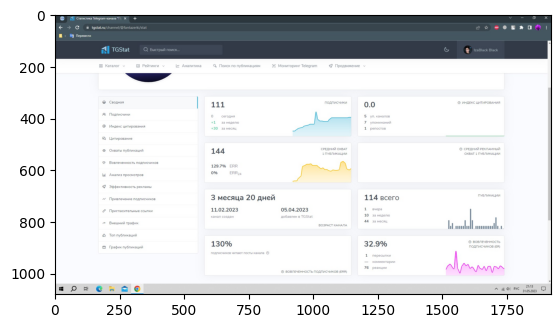

In [70]:
plt.imshow(imread(path))

In [71]:
%%time
result = reader.readtext(path)

CPU times: user 6.61 s, sys: 32.3 s, total: 38.9 s
Wall time: 12.1 s


In [72]:
image = imread(path)

In [73]:
boxes = [np.array(item[0]) for item in result]
texts = [np.array(item[1]) for item in result]

len(boxes)

73

In [74]:
image.shape

(1080, 1920, 3)

In [75]:
def get_dist_thresh(height, width):
    if height > width:
        return 1
    else:
        return 2

In [76]:
dist_thresh = get_dist_thresh(*image.shape[:2])
dist_thresh

2

# надо подобрать dist_thresh так, чтобы было разумное кол-во кластеров

# можно в цикле это сделать, можно иерархически, пока не успел придумать

In [77]:
%%time
clusters = get_clusters(np.array(boxes), texts, tight_scale=0, dist_thresh=dist_thresh)
len(clusters)

CPU times: user 695 ms, sys: 7.64 ms, total: 703 ms
Wall time: 701 ms


29

In [78]:
for cluster in clusters:
    cluster_color = tuple(np.random.randint(0, 255, 3).tolist())
    for box in [c[0] for c in cluster]:
        pts = np.array(box, np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(image, [pts], isClosed=True, color=cluster_color, thickness=2)

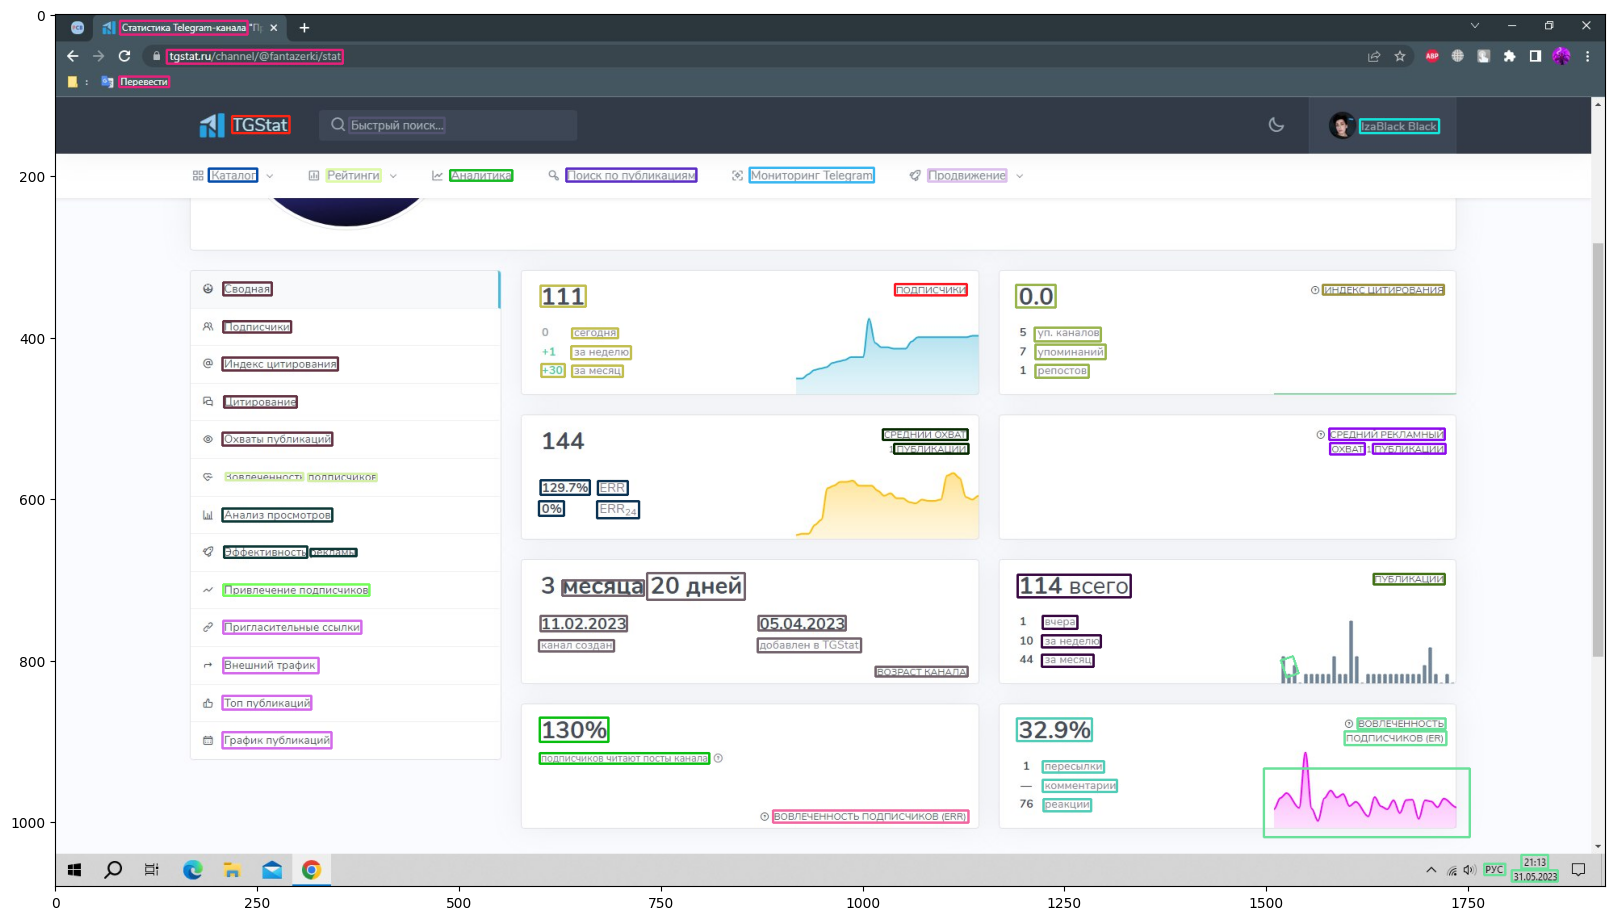

In [80]:
plt.figure(figsize=(20, 20))
plt.imshow(image)